In [1]:
# import the libraries ans read the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\StudentsPerformance.csv')   

In [2]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
data.shape

(1000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


### Q 1. Find out how many males and females participated in the test?

Number of Females: 518
Number of Males: 482


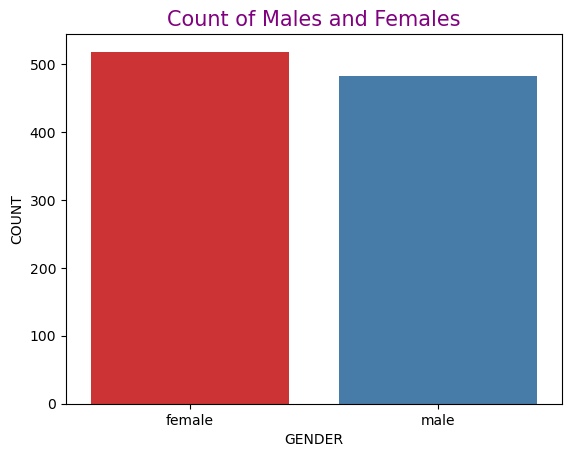

In [33]:
# count the number of males and females

gender_count = data['gender'].value_counts()

print("Number of Females:", gender_count['female'])
print("Number of Males:", gender_count['male'])


# plot a bar chart of the gender counts

sns.countplot(x = 'gender',data = data,palette="Set1")     

plt.title('Count of Males and Females',size = 15,color = "purple")  
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()    

######  There were 518 Females and 482 Males who participated in the test.

### Q 2. What do you think about the student's parental level of education?

MODE Of Parental Level Of Education: some college


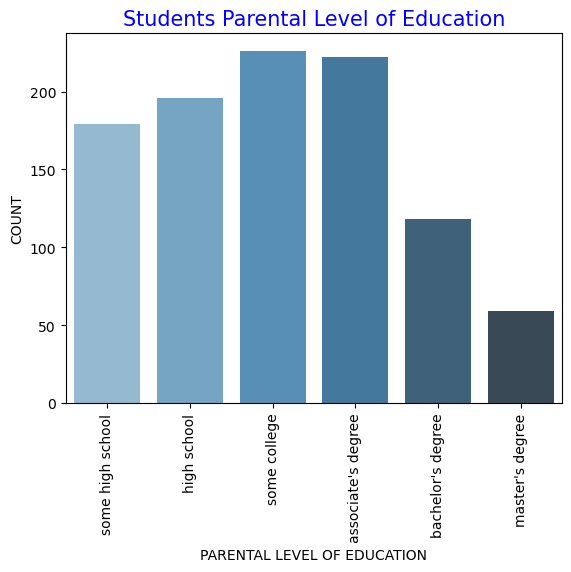

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [44]:
# calculate the MODE of student's parental level of education

mode_parental_edu = data['parental level of education'].mode()[0]
print("MODE Of Parental Level Of Education:", mode_parental_edu)


# plot a bar chart of the student's parental level of education counts

sns.countplot(x = 'parental level of education',data = data,palette='Blues_d')
plt.title('Students Parental Level of Education',size = 15,color ='b')        
plt.xticks(rotation=90)
plt.xlabel('PARENTAL LEVEL OF EDUCATION')
plt.ylabel('COUNT')
plt.show()


# Count the student's parental level of education

parental_edu_count = data['parental level of education'].value_counts()
parental_edu_count

###### From the output, it appears that the majority of the parents have some college or an associate's degree,and a small percentage of parents have a master's degree. We can also see that the most common parental level of education is "some college" followed by "associate's degree".This suggests that the majority of the student's parents have some college education or higher.

In [8]:
# Group the data by parental level of education and students performance 
# Calculate the mean, median, and standard deviation for each subject

parent_student_data = data.groupby(["parental level of education"])[["math score", "reading score", "writing score"]].agg(["mean", "median", "std"])
parent_student_data

math score                   reading score         \
                                  mean median        std          mean median   
parental level of education                                                     
associate's degree           67.977477   67.0  15.108190     71.018018   73.0   
bachelor's degree            69.288136   68.0  15.164117     73.000000   73.0   
high school                  61.821429   63.0  15.160466     64.602041   66.0   
master's degree              70.254237   73.0  14.843544     75.949153   76.0   
some college                 67.128319   68.0  14.871790     69.566372   71.0   
some high school             63.134078   65.0  16.602894     66.759777   67.0   

                                       writing score                    
                                   std          mean median        std  
parental level of education                                             
associate's degree           13.842999     70.031532   71.5  14.260787  
bachelor's degree            14.285250     73.381356   74.0  14.728262  
high school                  14.245280     62.403061   64.0  14.165172  
master's degree              13.046896     75.677966   75.0  13.730711  
some college                 14.312932     69.035398   70.0  15.089911  
some high school             15.710633     64.888268   66.0  15.736197

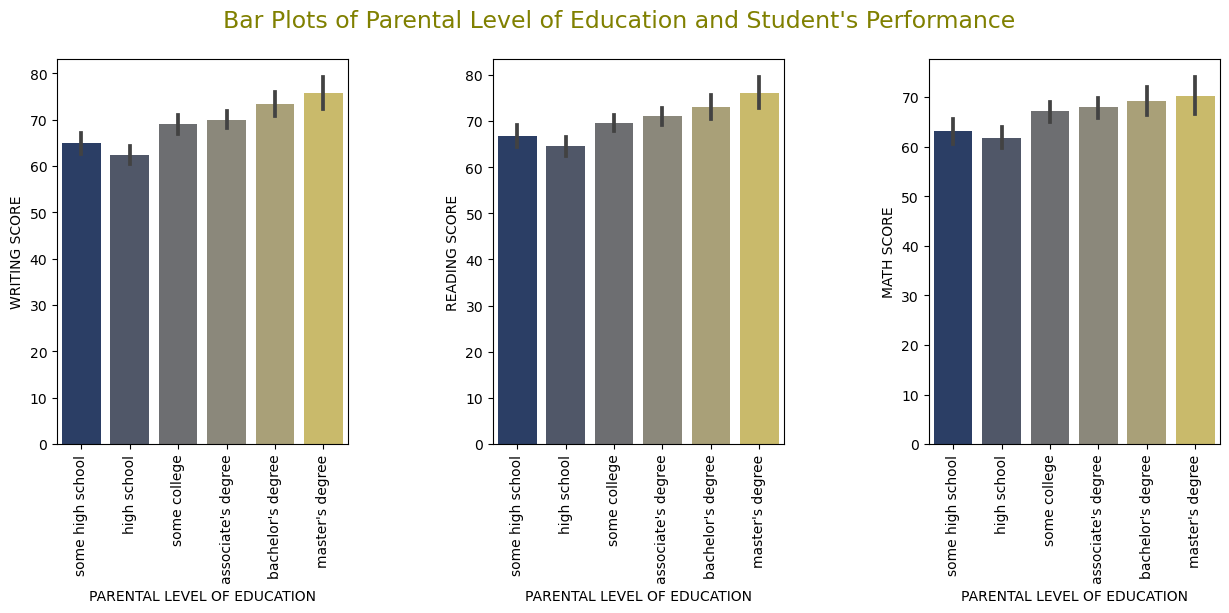

In [35]:
# create a grouped bar plot ( figure with three subplots) for parental level of education and student's performance

fig,axs = plt.subplots(ncols=3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)


sns.barplot(x="parental level of education", y='writing score', data=data,palette="cividis", ax=axs[0])

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('PARENTAL LEVEL OF EDUCATION')
axs[0].set_ylabel('WRITING SCORE')


sns.barplot(x="parental level of education", y='reading score', data=data,palette="cividis" ,ax=axs[1])

axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('PARENTAL LEVEL OF EDUCATION')
axs[1].set_ylabel('READING SCORE')


sns.barplot(x="parental level of education", y='math score', data=data,palette="cividis", ax=axs[2])

axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
axs[2].set_xlabel('PARENTAL LEVEL OF EDUCATION')
axs[2].set_ylabel('MATH SCORE')


fig.suptitle("Bar Plots of Parental Level of Education and Student's Performance",color='olive',size =17)
plt.show()

###### From the output,  it appears that students whose parents have a higher level of education generally have higher mean scores in math, reading, and writing. Therefore, it can be inferred that there is a positive correlation between parental level of education and student performance.We can also see that students whose parents have a high school education have a relatively high standard deviation in their math, reading, and writing scores, indicating that the scores in this group vary widely. In contrast, students whose parents have a master's degree have a relatively low standard deviation, indicating that the scores in this group are more tightly clustered around the mean.

### Q 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course


In [10]:
# Grouping the data by gender and test preparation course and calculating the mean score for each group

avg_score = data.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean()
avg_score

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

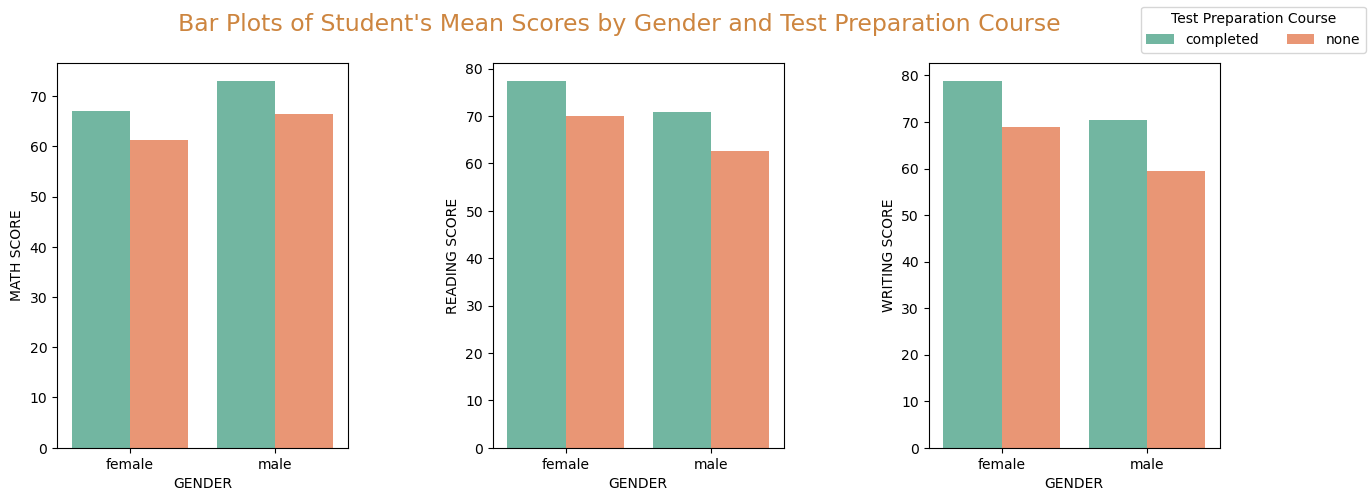

In [38]:
# create a grouped bar plot ( figure with three subplots) for student's mean scores by gender and test preparation course

mean_score = avg_score.reset_index()
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)


sns.barplot(x='gender', y="math score", hue="test preparation course", data=mean_score,palette="Set2", ax=axs[0])

axs[0].set_xlabel("GENDER")
axs[0].set_ylabel("MATH SCORE")
axs[0].get_legend().remove()


sns.barplot(x='gender', y="reading score", hue="test preparation course", data=mean_score,palette="Set2", ax=axs[1])

axs[1].set_xlabel("GENDER")
axs[1].set_ylabel("READING SCORE")
axs[1].get_legend().remove()


sns.barplot(x='gender', y="writing score", hue="test preparation course", data=mean_score,palette="Set2", ax=axs[2])

axs[2].set_xlabel("GENDER")
axs[2].set_ylabel("WRITING SCORE")
axs[2].get_legend().remove()


fig.suptitle("Bar Plots of Student's Mean Scores by Gender and Test Preparation Course",color='peru',size =17)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels,title="Test Preparation Course", loc='upper right', ncol=3)
plt.show()

###### In summary, the data suggests that completing the test preparation course can lead to better performance in math, reading, and writing for both females and males.

### Q 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [12]:
# group the data by gender and test preparation course, and calculate the mean, median, and standard deviation for each subject

score_std = data.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].agg(["mean", "median", "std"])
score_std

math score                   reading score  \
                                     mean median        std          mean   
gender test preparation course                                              
female completed                67.108696   67.0  14.428233     77.375000   
       none                     61.320359   62.0  16.510686     69.955090   
male   completed                72.988506   74.0  14.039164     70.793103   
       none                     66.467532   67.0  14.335746     62.581169   

                                                 writing score         \
                               median        std          mean median   
gender test preparation course                                          
female completed                 78.0  12.695493     78.793478   79.0   
       none                      71.0  14.636981     68.982036   70.0   
male   completed                 72.0  13.612420     70.339080   71.0   
       none                      63.0  13.595718     59.551948   60.0   

                                           
                                      std  
gender test preparation course             
female completed                12.240788  
       none                     15.016497  
male   completed                12.887910  
       none                     13.468284

In [13]:
# group the data by gender and test preparation course, and calculate variance 

score_variation = data.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].var()
score_variation

math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687

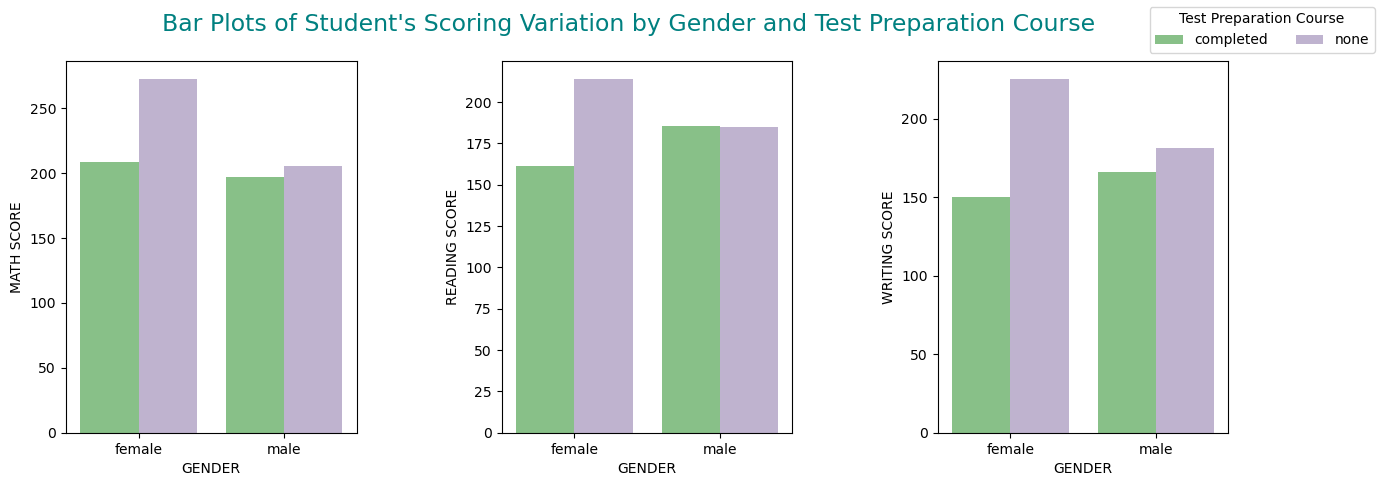

In [45]:
# create a grouped bar plot(figure with three subplots)for student's scoring variation by gender and test preparation course

variation_score = score_variation.reset_index()
fig, axs = plt.subplots(ncols=3, figsize=(15, 4.83))
plt.subplots_adjust(wspace=0.5)


sns.barplot(x="gender", y="math score", hue="test preparation course", data=variation_score, ax=axs[0],palette="Accent")

axs[0].set_xlabel("GENDER")
axs[0].set_ylabel("MATH SCORE")

axs[0].get_legend().remove()


sns.barplot(x="gender", y="reading score", hue="test preparation course", data=variation_score, ax=axs[1],palette="Accent")

axs[1].set_xlabel("GENDER")
axs[1].set_ylabel("READING SCORE")
axs[1].get_legend().remove()


sns.barplot(x="gender", y="writing score", hue="test preparation course", data=variation_score, ax=axs[2],palette="Accent")

axs[2].set_xlabel("GENDER")
axs[2].set_ylabel("WRITING SCORE")
axs[2].get_legend().remove()


fig.suptitle("Bar Plots of Student's Scoring Variation by Gender and Test Preparation Course",color='teal',size =17)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels,title="Test Preparation Course", loc='upper right', ncol=3)
plt.show()

###### In summary, the data suggests that completing the test preparation course seems to have a positive effect on students & the standard deviation provides additional information about the spread of scores within each group, and it confirms that completing the test preparation course can help to reduce the variation in scores for both females and males

### Q 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this ?

In [15]:
# tofind the top 25% of students based on their math score
# calculate the 25th percentile of the math scores using the quantile()

cutoff = data["math score"].quantile(0.75)
top_students = data[data["math score"] >= cutoff]
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


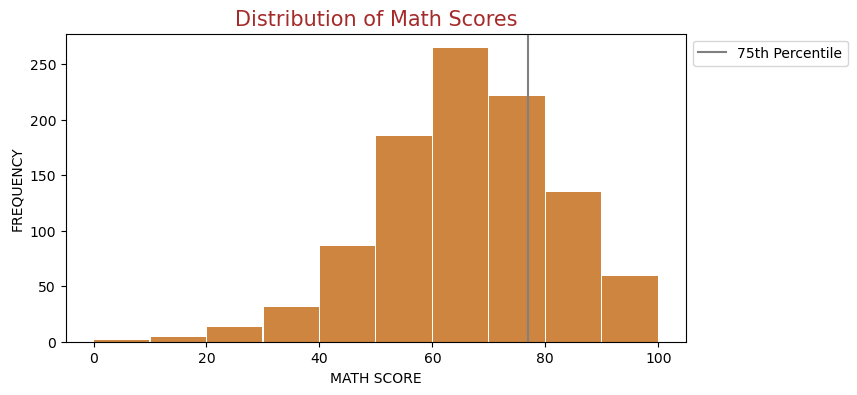

In [59]:
# create a histogram of the math scores with a vertical line at the 75th percentile

plt.figure(figsize=(8,4))
plt.hist(data['math score'],color = 'peru',rwidth =0.98)
              
# the top 25% of the students based on their math scores would be to the right of the vertical line at the 75th percentile

plt.axvline(x=cutoff, color='grey', label='75th Percentile')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.title("Distribution of Math Scores",size = 15,color ='brown')
plt.xlabel("MATH SCORE")
plt.ylabel("FREQUENCY")
plt.show()